<a id='step1'></a>
# 1. Подготовка данных

### 1.1 Загрузка и проверка данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import mean_absolute_error


from sklearn.model_selection import train_test_split

Загрузим датасеты, указав в качестве индекса колонку *date*.

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv', index_col=0)
test = pd.read_csv('/datasets/gold_recovery_test.csv', index_col=0)
full = pd.read_csv('/datasets/gold_recovery_full.csv', index_col=0)

In [3]:
def show_info(df, name):
    print('Информация по датафрейму', name)
    display(df)
    display(df.info())
    display(df.describe())

In [4]:
show_info(train, 'train')

Информация по датафрейму train


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_cleaner.i

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [5]:
show_info(test, 'test')

Информация по датафрейму test


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882


<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                         584

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [6]:
show_info(full,'full')

Информация по датафрейму full


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_cleaner.i

None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


При первичном изучении данных мы обнаружили наличие пропусков в таблицах. Отметим так же отсутствие категориальных признаков, требующих дополнительной обработки.

### 1.2 Проверка расчета эффективности

In [7]:
train_dropped = train.dropna()

In [8]:
def recovery(c, f, t):
    value = ((c * (f - t)) / (f * (c - t))) * 100
    return value

In [9]:
recovery_pred = recovery(train_dropped['rougher.output.concentrate_au'],
                         train_dropped['rougher.input.feed_au'],
                         train_dropped['rougher.output.tail_au'])

In [10]:
mae = mean_absolute_error(train_dropped['rougher.output.recovery'], recovery_pred)
mae

9.555596961987514e-15

MAE между нашими расчетами и значением признака находится очень близко к 0, таким образом можем считать, что эффективность рассчитана верно.

### 1.3 Анализ тестовой выборки

В тестовом датасете отсутствуют признаки, соответствующие параметрам продукта на каждом этапе, а так же расчетные характеристики.

Помимо этого, в тестовой выборке отсутствуют целевые признаки:
- rougher.output.recovery;
- final.output.recovery.

### 1.4 Предобработка данных

Осуществим заполнение выявленных на этапе изучения данных пропуски.

Воспользуемся подсказкой из задания, согласно которой соседние по времени параметры часто похожи, и укажем в параметре *method* фуннции *fillna()* значение **ffill**.

In [11]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
full = full.fillna(method='ffill')

<a id='step2'></a>
# 2. Анализ данных

### 2.1 Изучение концентрации металлов на разных этапах

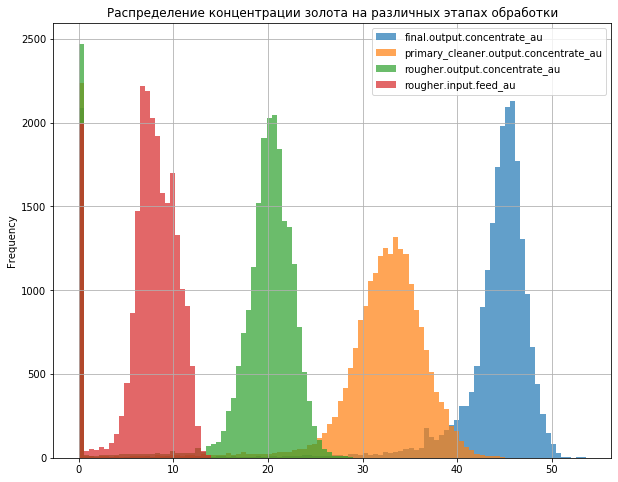

In [12]:
plot = full[['final.output.concentrate_au', 
             'primary_cleaner.output.concentrate_au', 
             'rougher.output.concentrate_au', 
             'rougher.input.feed_au']].plot(
    kind="hist", grid=True,figsize=(10,8), alpha=0.7, 
    bins=100, title='Распределение концентрации золота на различных этапах обработки')

По графику распределений можем наблюдать увеличение концентрации золота в сырье по мере прохождения различных этапов обработки. Этот факт соответствует логике происходящего процесса.

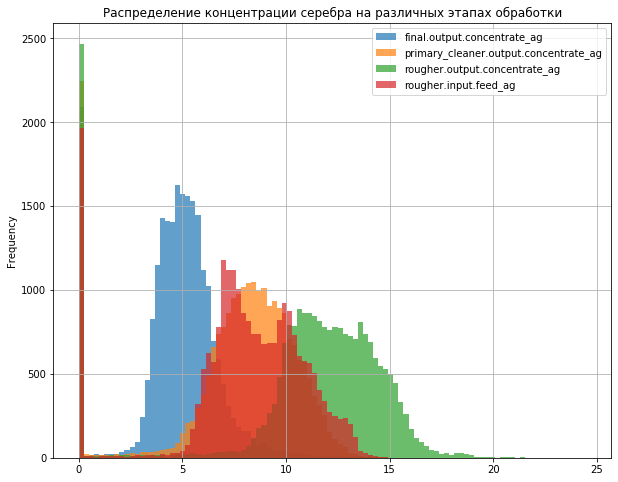

In [13]:
plot = full[['final.output.concentrate_ag', 
             'primary_cleaner.output.concentrate_ag', 
             'rougher.output.concentrate_ag', 
             'rougher.input.feed_ag']].plot(
    kind="hist", grid=True,figsize=(10,8), alpha=0.7, 
    bins=100, title='Распределение концентрации серебра на различных этапах обработки')

В отличие от распределения золота, количество серебра в сырье уменьшается по мере прохождения этапов, что так же соответствует логике процесса.

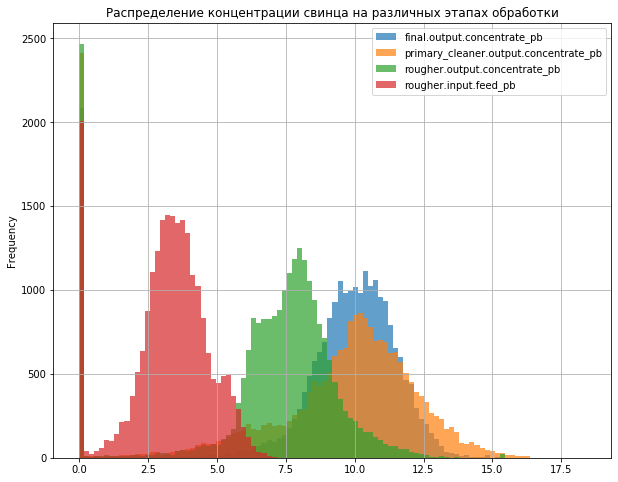

In [14]:
plot = full[['final.output.concentrate_pb', 
             'primary_cleaner.output.concentrate_pb', 
             'rougher.output.concentrate_pb', 
             'rougher.input.feed_pb']].plot(
    kind="hist", grid=True,figsize=(10,8), alpha=0.7, 
    bins=100, title='Распределение концентрации свинца на различных этапах обработки')

В отличие от концентрации серебра, концентрация свинца увеличивается по мере очистки сырья, однако в сравнении с золотом, основная часть распределения которого лежит между 40% и 50%, свинца на финальном этапе от 7.5% до 12.5%. Отметим это как особенность конкретного процесса обработки руды, не так хорошо справляющегося с очисткой от свинца.

Помимо прочего отметим, что на всех распределениях наблюдается значительное число выбросов со значениями концентрации, равной нулю или близкими к нему.

### 2.2 Изучение распределения размеров гранул сырья

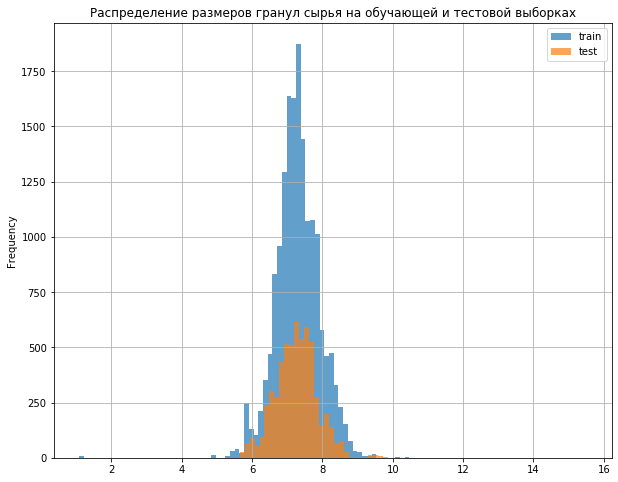

In [15]:
ax = train[['primary_cleaner.input.feed_size']].plot(
    kind="hist", grid=True,figsize=(10,8), alpha=0.7, 
    bins=70)
plot = test[['primary_cleaner.input.feed_size']].plot(
    ax= ax, kind="hist", grid=True,figsize=(10,8), alpha=0.7, 
    bins=70, title='Распределение размеров гранул сырья на обучающей и тестовой выборках')
plot = plot.legend(['train','test'])

Распределения размеров гранул сырья на обучающей и тестовой выборках визуально схожи, различаясь только размером. На обучение и проверку модели этот параметр оказать влияния не должен.

### 2.3 Изучение суммарной концентрации всех веществ на разных стадиях

In [16]:
final_concentrate_sum = full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_sol'] + full['final.output.concentrate_au']
primary_concentrate_sum = full['primary_cleaner.output.concentrate_ag'] + full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_sol'] + full['primary_cleaner.output.concentrate_au']
rougher_concentrate_sum = full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_sol'] + full['rougher.output.concentrate_au']

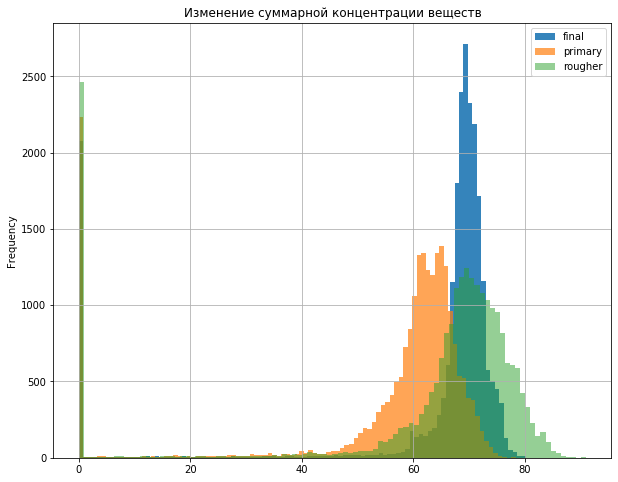

In [17]:
ax = final_concentrate_sum.plot(kind='hist', grid=True,figsize=(10,8), alpha=0.9, 
    bins=100)
ax2 = primary_concentrate_sum.plot(ax=ax, kind='hist', grid=True,figsize=(10,8), alpha=0.7, 
    bins=100)
plot = rougher_concentrate_sum.plot(ax=ax2, kind='hist', grid=True,figsize=(10,8), alpha=0.5, 
    bins=100, title='Изменение суммарной концентрации веществ')
plot = plot.legend(['final','primary','rougher'])

Суммарная концентрация всех веществ увеличивается по мере очистки сырья.

На гистограммах наблюдается аномальный всплеск значений в районе нуля, который может обозначать пустое сырье. Удалим эти значения, способные повлиять на обучаемую модель.

### 2.4 Обработка аномалий

Выделим выборки с выбивающимися значениями (суммарная концентрация меньше 1), а затем удалим по индексам эти строки из выборки **full**. На следующем шаге будем использовать этот датафрейм для получения обучающих и тестовых выборок.

In [18]:
final_index = full[full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] +
                   full['final.output.concentrate_sol'] + full['final.output.concentrate_au']<1]
primary_index = full[full['primary_cleaner.output.concentrate_ag'] + full['primary_cleaner.output.concentrate_pb'] +
                   full['primary_cleaner.output.concentrate_sol'] + full['primary_cleaner.output.concentrate_au']<1]
rougher_index = full[full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] +
                     full['rougher.output.concentrate_sol'] + full['rougher.output.concentrate_au']<1]

In [19]:
anomaly_index = pd.merge(final_index, primary_index, on='date', how='outer')
anomaly_index = pd.merge(anomaly_index, rougher_index, on='date', how='outer')

In [20]:
full = full.drop(anomaly_index.index)
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19670 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           19670 non-null float64
final.output.concentrate_pb                           19670 non-null float64
final.output.concentrate_sol                          19670 non-null float64
final.output.concentrate_au                           19670 non-null float64
final.output.recovery                                 19670 non-null float64
final.output.tail_ag                                  19670 non-null float64
final.output.tail_pb                                  19670 non-null float64
final.output.tail_sol                                 19670 non-null float64
final.output.tail_au                                  19670 non-null float64
primary_cleaner.input.sulfate                         19670 non-null float64
primary_cleaner.input.depressant                      19670 non-null float64
primary_cleaner.i

<a id='step3'></a>
# 3. Модель

### 3.1 Подготовка обучающей и тестовой выборок

Получим целевые признаки, выбрав из датасета **full** значения с индексами, соответствующими индексам в тестовой выборке.

In [21]:
true_test = pd.merge(full, test, on='date')
test_features = full[test.columns].loc[true_test.index]
test_target = full[['rougher.output.recovery','final.output.recovery']].loc[test_features.index]

Обучающие выборки с признаками и целевыми признаками так же определим, оставив только те индексы, что сохранились в выборке **full** после предобработки.

In [22]:
true_train = pd.merge(full, train, on='date')
train_target = full[['rougher.output.recovery','final.output.recovery']].loc[true_train.index]
train_features = full[train.columns].loc[true_train.index]
train_features = train_features.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
train_features = train_features[test_features.columns]

In [23]:
print(test_features.shape)
print(test_target.shape)
print(train_features.shape)
print(train_target.shape)

(5274, 52)
(5274, 2)
(14396, 52)
(14396, 2)


### 3.2 Подготовка функций

Подготовим функции рассчета sMAPE и итоговой sMAPE. Создадим *scorer*, используемый в кросс-валидации при подборе гиперпараметров моделей.

In [24]:
def smape(trgt, pred):
    value = 100 / len(pred) * np.sum(2 * np.abs(trgt - pred) / (np.abs(trgt) + np.abs(pred)))
    return value[0], value[1]

def f_smape(trgt, pred):
    smape_val = smape(trgt, pred)
    value = 0.25 * smape_val[0] + 0.75 * smape_val[1]
    return value

In [25]:
f_smape_scorer = make_scorer(f_smape)

### 3.3 Обучение моделей

#### Линейная регрессия

In [26]:
model_lin_reg = LinearRegression()
cv_lin_reg = cross_val_score(model_lin_reg, train_features, train_target, cv=5, scoring=f_smape_scorer)
fsmape_lin = np.mean(cv_lin_reg)
print('Среднее значение итоговой sMAPE для линейной регрессии при кросс-валидации:', fsmape_lin)

Среднее значение итоговой sMAPE для линейной регрессии при кросс-валидации: 10.767837733680732


#### Решающее дерево

In [27]:
%%time

tree_params = []
for depth in range(2, 40, 2):
    model = DecisionTreeRegressor(max_depth=depth, random_state=127)
    scores = cross_val_score(model, train_features, train_target, cv=5, scoring=f_smape_scorer)
    final_score = np.mean(scores)
    tree_params.append([depth,final_score])

CPU times: user 1min 25s, sys: 16 ms, total: 1min 25s
Wall time: 1min 26s


In [28]:
tree_df = pd.DataFrame(tree_params, columns = ['depth','final_score'])
tree_df.sort_values(by='final_score', ascending=True)

,depth,final_score
0,2,9.666164
1,4,9.819583
2,6,10.275004
3,8,12.361925
4,10,13.294147
17,36,14.916944
18,38,15.301877
15,32,15.360770
5,12,15.637588
8,18,15.765220


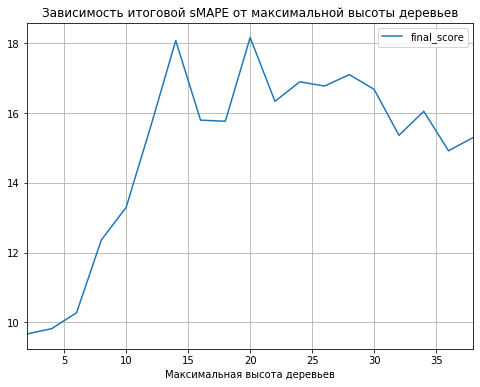

In [29]:
plot = tree_df.plot(x='depth', grid=True, figsize=(8,6), 
               title='Зависимость итоговой sMAPE от максимальной высоты деревьев')
plot = plot.set_xlabel('Максимальная высота деревьев')

Лучшей моделью по метрике итоговой sMAPE оказалось дерево с высотой 2. Итоговая sMAPE при этом равна 9,7%.

#### Случайный лес

Воспользуемся информацией о росте итоговой sMAPE при больших значениях высоты дерева, ограничив этот гиперпараметр диапазоном от 2 до 20 при подборе гиперпараметров.

In [30]:
%%time

forest_params = []
for estim in range(5, 50, 5):
    for depth in range(2,20, 2):
        model = RandomForestRegressor(max_depth=depth, n_estimators=estim, random_state=127)
        scores = cross_val_score(model, train_features, train_target, cv=3, scoring=f_smape_scorer)
        final_score = np.mean(scores)
        forest_params.append([estim,depth,final_score])
        print(depth, estim, final_score)

2 5 11.298192178796798
4 5 10.808031690169441
6 5 11.13553254108686
10 5 12.869499252821848
12 5 13.766417881211511
14 5 13.003513764231556
16 5 14.341456081025568
18 5 13.27890734635789
2 10 11.114626559192038
4 10 10.582197003240063
6 10 11.234427380356815
8 10 11.71224478275112
10 10 12.259601804934851
12 10 12.420589824607143
14 10 12.655085837012365
16 10 13.018747735266658
18 10 12.717659698921805
2 15 11.077711574733497
4 15 10.578272317883966
6 15 11.124805121627672
8 15 11.665558914219995
10 15 11.691725422262612
12 15 12.184032787682638
14 15 12.255085777784336
16 15 12.460908297290539
18 15 12.212814806164792
2 20 11.078359529921405
4 20 10.52991745274017
6 20 10.931303470277326
8 20 11.370836348915061
10 20 11.45660018868528
12 20 11.861595195767025
14 20 11.901142278631077
16 20 12.049937053918873
18 20 11.838774754461411
2 25 11.075046792004002
4 25 10.497079320016436
6 25 10.868226430694895
8 25 11.250741715314716
10 25 11.417692373658104
12 25 11.71667611058704
14 25 11

In [35]:
forest_df = pd.DataFrame(forest_params, columns = ['estim','depth','final_score'])
forest_df.sort_values(by='final_score', ascending=True)

,estim,depth,final_score
73,45,4,10.449131
64,40,4,10.454526
46,30,4,10.457815
55,35,4,10.471772
37,25,4,10.497079
...,...,...,...
6,5,14,13.003514
16,10,16,13.018748
8,5,18,13.278907
5,5,12,13.766418


Наибольшее значение метрики итоговой sMAPE составляет 10,4% для моделей случайного леса, что уступает модели дерева решений.

### Проверка модели

Лучшей моделью по итоговой sMAPE оказалось решающее дерево с *depth=2*. 

Среднее значение итоговой sMAPE при кросс-валидации для такой модели - 9,7%.

Проверим модель на тестовой выборке.

In [39]:
model_tree = DecisionTreeRegressor(max_depth=2, random_state=127)
model_tree.fit(train_features,train_target)
pred_tree = model_tree.predict(test_features)
smape_tree = f_smape(test_target, pred_tree)
print('Значение итоговой sMAPE для решающего дерева:', smape_tree)

Значение итоговой sMAPE для решающего дерева: 9.089274763149314


Таким образом, подобранная модель показала улучшение показателя целевой метрики на тестовой выборке.